# This was the 2nd round of Cascade Challenge where we got rank 36

## Importing necessary packages and dataset

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

In [2]:
df = pd.read_csv('socialage.csv')
df1=pd.read_csv('test_age_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


## Checking the correlation of target axis

In [4]:
df.corr()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
Unnamed: 0,1.000000,0.211034,0.233388,-0.021786,-0.015027,-0.014233,-0.014613,-0.009107,0.001472,0.005830,...,0.020646,-0.014836,0.021685,0.000974,0.010086,0.007160,0.003637,0.007018,0.016544,0.197699
userId,0.211034,1.000000,0.042470,0.074968,-0.001291,-0.193482,-0.209797,-0.052181,-0.009496,-0.008383,...,0.172518,-0.007649,0.108805,0.141520,0.054879,0.127023,0.121927,0.105013,-0.196902,-0.157153
tier,0.233388,0.042470,1.000000,-0.016541,-0.018307,-0.083842,-0.081714,-0.056094,-0.003478,0.000556,...,-0.070927,-0.034330,-0.066373,-0.078578,-0.039615,-0.060116,-0.068885,-0.067069,-0.032874,-0.072481
gender,-0.021786,0.074968,-0.016541,1.000000,-0.006732,-0.030644,-0.038668,0.026174,-0.000551,0.016659,...,0.042050,0.007200,0.042003,0.041335,0.012666,0.020852,0.059830,0.031795,-0.017826,-0.038184
following_rate,-0.015027,-0.001291,-0.018307,-0.006732,1.000000,0.064708,0.060746,0.042046,-0.000267,-0.000094,...,0.068105,0.097322,0.069426,0.078755,0.037387,0.067126,0.066273,0.067535,0.000386,0.023195
followers_avg_age,-0.014233,-0.193482,-0.083842,-0.030644,0.064708,1.000000,0.939639,0.172344,0.007151,0.002966,...,0.132141,0.091373,0.142942,0.149755,0.090253,0.124700,0.128054,0.130733,0.105896,0.285148
following_avg_age,-0.014613,-0.209797,-0.081714,-0.038668,0.060746,0.939639,1.000000,0.165079,0.007410,0.003194,...,0.116855,0.086352,0.129871,0.133434,0.082049,0.111925,0.114027,0.117371,0.108857,0.285585
max_repetitive_punc,-0.009107,-0.052181,-0.056094,0.026174,0.042046,0.172344,0.165079,1.000000,0.013202,0.036628,...,0.104363,0.134459,0.124927,0.132210,0.076631,0.109411,0.117538,0.112034,0.015238,0.150556
num_of_hashtags_per_action,0.001472,-0.009496,-0.003478,-0.000551,-0.000267,0.007151,0.007410,0.013202,1.000000,0.082216,...,-0.007262,-0.000665,-0.005060,-0.006013,-0.002130,-0.005646,-0.005094,-0.004785,0.005928,0.004520
emoji_count_per_action,0.005830,-0.008383,0.000556,0.016659,-0.000094,0.002966,0.003194,0.036628,0.082216,1.000000,...,-0.014948,-0.001184,-0.010307,-0.012633,-0.004726,-0.011646,-0.010229,-0.010284,0.000373,0.003357


## Dropping the columns which have very less correlation

In [5]:
df=df.drop(['num_of_hashtags_per_action','punctuations_per_action'],axis=1)
df1=df1.drop(['num_of_hashtags_per_action','punctuations_per_action'],axis=1)


<AxesSubplot:xlabel='Unnamed: 0'>

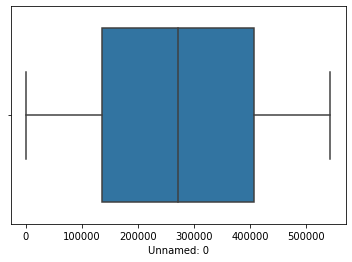

In [6]:
sns.boxplot(x='Unnamed: 0',data=df)

In [7]:
# df=df[df['max_repetitive_punc']<125]

In [8]:
scale_columns=list(set(list(df.columns))-set(['Unnamed: 0','userId','age_group']))

## Scaling the dataset to ease the training process

In [9]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

## Splitting to train and test dataset also with their target column

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('age_group',axis=1).values
y = df['age_group'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.006)

In [32]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X1=scaler.fit_transform(df1)

# Importing XGBoost as it was the best model for this dataset

In [15]:
from xgboost import XGBClassifier
# model6 = XGBClassifier()
# model6.fit(X_train,y_train)

In [16]:
# from sklearn.metrics import classification_report,confusion_matrix
# prediction = model6.predict(X_test)
# print(classification_report(y_test,prediction))

# Prediction

In [18]:
from sklearn.preprocessing import RobustScaler
df = pd.read_csv('socialage.csv')
df.drop(df[df.slot2_trails_watched_per_day>10].index,inplace=True)
df.drop(df[df.slot1_trails_watched_per_day>10].index,inplace=True)
df.drop(df[df.slot3_trails_watched_per_day>20].index,inplace=True)
df.drop(df[df.slot4_trails_watched_per_day>25].index,inplace=True)
df.drop(df[df.avgt2>22000].index,inplace=True)
df.drop(['num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action',
         'tier','gender','following_rate','avgTimeSpent','avgCompletion','avgDuration','avgComments',
         'creations','num_of_comments'],axis=1,inplace=True)

from sklearn.model_selection import train_test_split

X = df.drop('age_group',axis=1)
y = df['age_group']

scaler = RobustScaler()
scale_columns=list(set(list(df.columns))-set(['Unnamed: 0','userId','age_group']))
X[scale_columns] = scaler.fit_transform(X[scale_columns])



from xgboost import XGBClassifier
model = XGBClassifier(
            subsample=1.0,
            silent=False,
            reg_lamba=10.0,
            n_estimators=200,
            min_child_weight=7.0,
            max_depth=15,
            learning_rate=0.33,
            gamma=0.25,
            colsample_bytree=0.5,
            colsample_bylevel=1.0)

In [19]:
from sklearn.model_selection import train_test_split
def data_split(X,y):
    np.random.seed(0)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01)
    return X_train,X_test,y_train,y_test

In [20]:
from sklearn.metrics import f1_score
def train_model(model,X,y):
    X_train,X_test,y_train,y_test = data_split(X,y)
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    score = f1_score(y_test,y_preds,average='weighted')
    print(score)
    return model

In [21]:
model = train_model(XGBClassifier(
            subsample=1.0,
            silent=False,
            reg_lamba=10.0,
            n_estimators=200,
            min_child_weight=7.0,
            max_depth=15,
            learning_rate=0.33,
            gamma=0.25,
            colsample_bytree=0.5,
            colsample_bylevel=1.0),X,y)

[11:30:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { reg_lamba, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.8037944154487912


### This hyperparameter gave us the best prediction 0.81 F1 Score 

# Randomized search

In [29]:
model7 = XGBClassifier(colsample_bylevel= 1.0,
colsample_bytree = 0.5,
gamma= 0.3,
learning_rate=0.3,
max_depth= 14,
min_child_weight= 6.6,
n_estimators= 200,
reg_lambda= 10,
silent= False,
subsample= 1.0)

In [30]:
model7.fit(X_train,y_train)

[11:39:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=14,
              min_child_weight=6.6, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=10, scale_pos_weight=None, silent=False, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

## creating the submission file for our prediction

In [33]:
predictionbest = model7.predict(X1)
predictionbest=pd.DataFrame(data=predictionbest,columns=['prediction'])
predictionbest.to_csv('submission_best.csv',index=False)